In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Configure visualizations
sns.set_theme(style="whitegrid")

In [2]:

def district_error_analysis(file_paths):
    district_errors = {}

    for file_path in file_paths:
        # Load dataset
        data = pd.read_csv(file_path)
        crop_name = file_path.split('/')[-1].split('_')[0]  # Extract crop name

        # One-hot encode DISTRICT_NAME
        data = pd.get_dummies(data, columns=['DISTRICT_NAME'], prefix='DISTRICT', drop_first=True)

        # Prepare features and target
        X = data.drop(columns=['YEAR', 'CROP_TYPE', 'PRODUCTION'])
        y = data['PRODUCTION']

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train model
        rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
        rf_model.fit(X_train, y_train)

        # Predict
        y_pred = rf_model.predict(X_test)

        # Calculate errors per district
        district_columns = [col for col in X.columns if col.startswith('DISTRICT_')]
        for district_col in district_columns:
            mask = X_test[district_col] == 1
            if mask.sum() > 0:
                district_name = district_col.replace('DISTRICT_', '')
                mse = mean_squared_error(y_test[mask], y_pred[mask]) if mask.any() else 0
                district_errors[district_name] = district_errors.get(district_name, 0) + mse

    # Convert results to DataFrame
    error_df = pd.DataFrame(list(district_errors.items()), columns=["District", "Total_Error"])

    # Plot top 10 districts by highest error
    top_error_df = error_df.sort_values(by="Total_Error", ascending=False).head(10)
    plt.figure(figsize=(12, 6))
    sns.barplot(x="Total_Error", y="District", data=top_error_df, palette="Reds_r")
    plt.title("Top 10 Districts with Highest Prediction Errors (Across All Crops)")
    plt.xlabel("Total Prediction Error (MSE)")
    plt.ylabel("District")
    plt.show()

    # Plot top 10 districts by lowest error
    low_error_df = error_df.sort_values(by="Total_Error", ascending=True).head(10)
    plt.figure(figsize=(12, 6))
    sns.barplot(x="Total_Error", y="District", data=low_error_df, palette="Greens_r")
    plt.title("Top 10 Districts with Lowest Prediction Errors (Across All Crops)")
    plt.xlabel("Total Prediction Error (MSE)")
    plt.ylabel("District")
    plt.show()

    return top_error_df, low_error_df

C:\Users\aayus\AppData\Local\Temp\ipykernel_16768\2564534347.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Total_Error", y="District", data=top_error_df, palette="Reds_r")


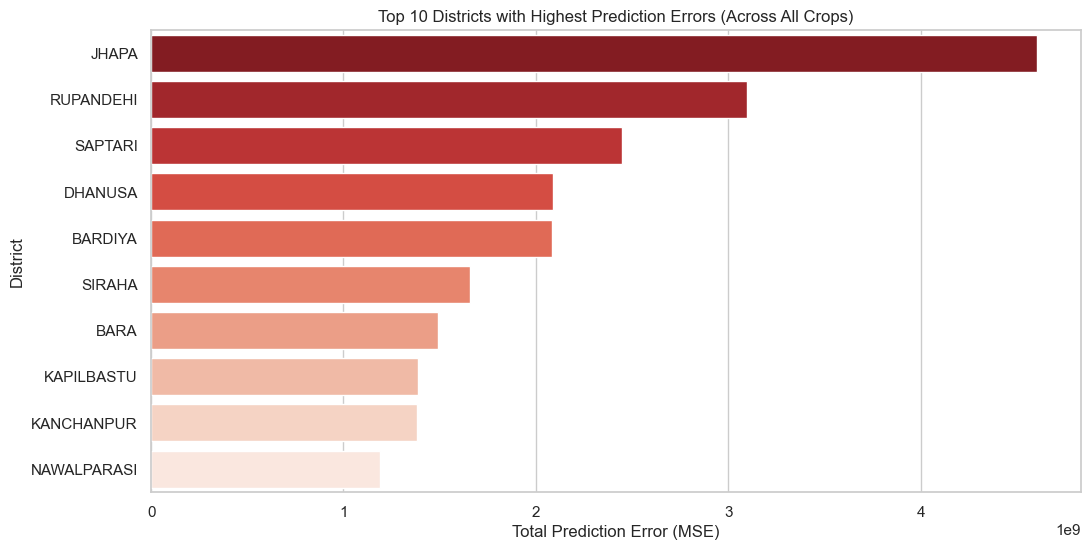

C:\Users\aayus\AppData\Local\Temp\ipykernel_16768\2564534347.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Total_Error", y="District", data=low_error_df, palette="Greens_r")


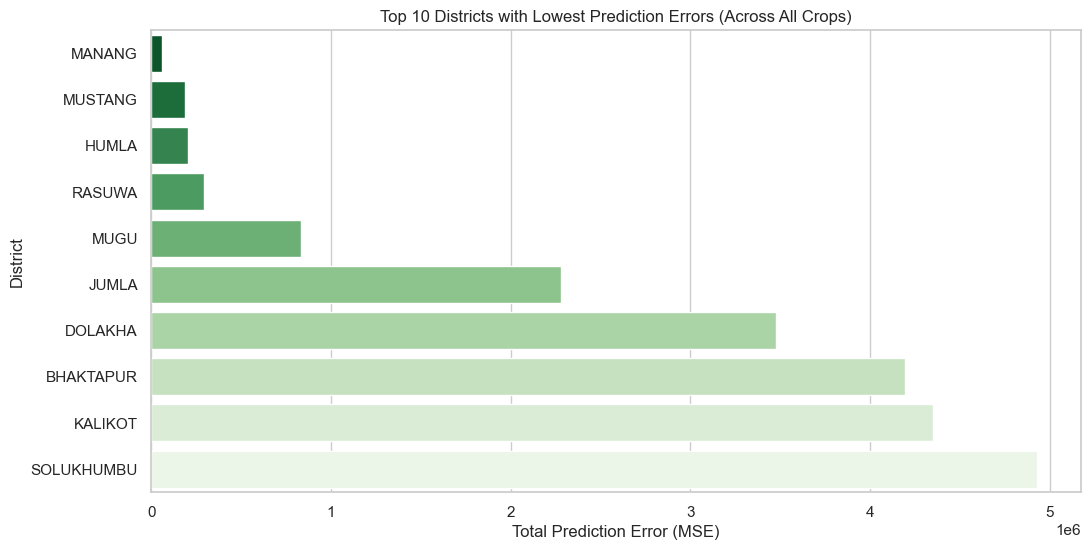

Top 10 Districts with Highest Errors Across All Crops:
       District   Total_Error
26        JHAPA  4.604113e+09
58    RUPANDEHI  3.097579e+09
61      SAPTARI  2.446352e+09
17      DHANUSA  2.086476e+09
7       BARDIYA  2.082699e+09
65       SIRAHA  1.658179e+09
6          BARA  1.492675e+09
31   KAPILBASTU  1.386796e+09
30   KANCHANPUR  1.384278e+09
45  NAWALPARASI  1.190522e+09
Top 10 Districts with Lowest Errors Across All Crops:
      District   Total_Error
40      MANANG  5.905778e+04
43     MUSTANG  1.871776e+05
23       HUMLA  2.069848e+05
54      RASUWA  2.951539e+05
42        MUGU  8.321479e+05
27       JUMLA  2.282822e+06
18     DOLAKHA  3.476965e+06
8    BHAKTAPUR  4.192273e+06
29     KALIKOT  4.348391e+06
66  SOLUKHUMBU  4.927051e+06


In [3]:


# List of file paths
file_paths = [
    "FinalDatasets/BARLEY_data_merged.csv",
    "FinalDatasets/MAIZE_data_merged.csv",
    "FinalDatasets/MILLET_data_merged.csv",
    "FinalDatasets/PADDY_data_merged.csv",
    "FinalDatasets/WHEAT_data_merged.csv",
]

# Run district error analysis
top_district_error_results, low_district_error_results = district_error_analysis(file_paths)
print("Top 10 Districts with Highest Errors Across All Crops:")
print(top_district_error_results)
print("Top 10 Districts with Lowest Errors Across All Crops:")
print(low_district_error_results)
